<a href="https://colab.research.google.com/github/PhanDinhPhong/BTVN3/blob/main/btvn3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

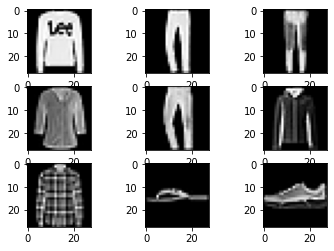

In [20]:
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import utils
from keras.models import Sequential
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
for i in range(1,10):
  plt.subplot(330+i)
  plt.imshow(x_test[i],cmap= 'gray')

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train= x_train.reshape(60000,28,28,1)
x_test= x_test.reshape(10000,28,28,1)
x_train/= 255
x_test/= 255
y_train= np_utils.to_categorical(y_train,10)
y_test= np_utils.to_categorical(y_test,10)

In [21]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),input_shape=(28,28),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),input_shape=(28,28),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

In [22]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics= ['accuracy'])
history= model.fit(x_train,y_train,batch_size= 128,epochs= 100,verbose=1,validation_data= (x_test,y_test),callbacks = [EarlyStopping(monitor= 'val_loss',patience= 20)])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.7176 - accuracy: 0.7358 - val_loss: 0.5096 - val_accuracy: 0.8135
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4528 - accuracy: 0.8348 - val_loss: 0.4457 - val_accuracy: 0.8349
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3805 - accuracy: 0.8595 - val_loss: 0.3864 - val_accuracy: 0.8555
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3377 - accuracy: 0.8763 - val_loss: 0.3553 - val_accuracy: 0.8685
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3090 - accuracy: 0.8865 - val_loss: 0.3359 - val_accuracy: 0.8747
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2853 - accuracy: 0.8943 - val_loss: 0.3139 - val_accuracy: 0.8847
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2593 - accuracy: 0.9037 - val_loss: 0.3039 - val_accuracy: 0.8883

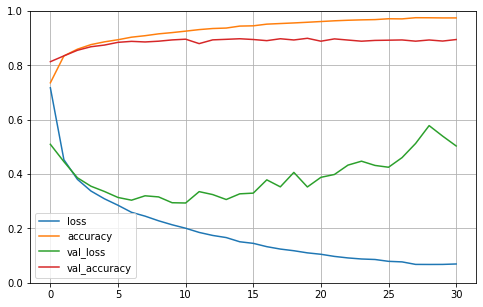

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


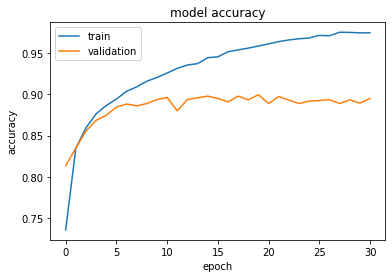

In [23]:
score = model.evaluate(x_test, y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

Đoán là:  Pullover


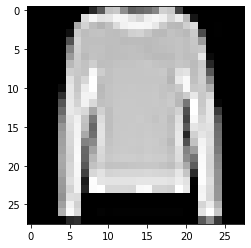

In [34]:
m = 99
Label = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
y_predict = model.predict(x_test[m].reshape(1,28,28,1))
print('Đoán là: ', Label[np.argmax(y_predict)])
plt.imshow(x_test[m],cmap= 'gray')

In [35]:
model.save('fashion_mnist_cnn.h5')